## Импорт библиотек

In [2]:
import pandas as pd
import sqlite3

## Соединение с базой данных

In [3]:
connection = sqlite3.connect('../data/checking-logs.sqlite')

## Запрос к базе данных

In [4]:
padview_query = 'SELECT datetime FROM pageviews WHERE uid LIKE "user_%"'
checker_query = 'SELECT timestamp FROM checker WHERE uid LIKE "user_%"'
pageviews = pd.read_sql(padview_query, connection)
checker = pd.read_sql(checker_query, connection)

In [12]:
pageviews

,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1
5,2020-04-23,5
6,2020-04-25,1
7,2020-04-26,8
8,2020-04-28,2
9,2020-04-29,4


In [13]:
checker

,date,commits
0,2020-04-17,23
1,2020-04-18,69
2,2020-04-19,33
3,2020-04-20,25
4,2020-04-21,25
5,2020-04-22,28
6,2020-04-23,43
7,2020-04-24,16
8,2020-04-25,104
9,2020-04-26,261


## Датафреймы и график

In [7]:
pageviews['datetime'] = pd.to_datetime(pageviews['datetime'])
pageviews['date'] = pageviews['datetime'].dt.date
pageviews = pageviews.groupby('date').size().reset_index(name='views')
pageviews.count()

date     33
views    33
dtype: int64

In [8]:
checker['timestamp'] = pd.to_datetime(checker['timestamp'])
checker['date'] = checker['timestamp'].dt.date
checker = checker.groupby('date').size().reset_index(name='commits')
checker.count()

date       35
commits    35
dtype: int64

In [9]:
main_df = pageviews.merge(checker, on='date')
main_df.count()

date       32
views      32
commits    32
dtype: int64

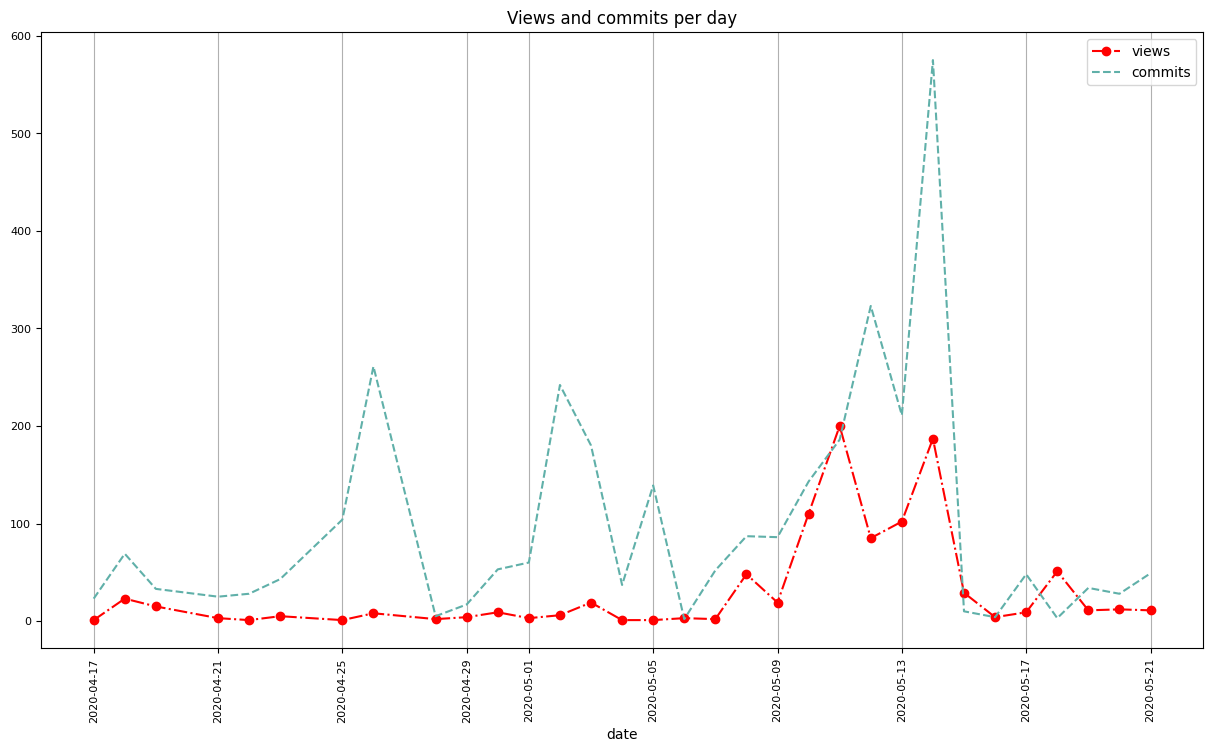

In [10]:
main_df.plot(kind='line', x='date', y=['views', 'commits'], title='Views and commits per day', 
             xlabel='date', figsize=(15,8), legend=True, fontsize=8, rot=90, style=['-.o', '--'],
             color=['red', '#60B0A9FF']).xaxis.grid(True)

## Закрытие соединения с БД

In [11]:
connection.close()

## Сколько раз количество просмотров превышало 150?

### Ответ: 2